In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

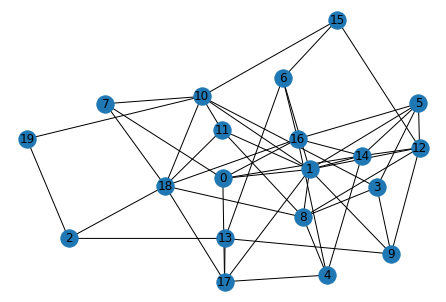

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}

attr = "type"
attrRange = ["Virtue","Utilitarian","Deontology"]
outcomeNetwork = {}
type = "virtue"

for val in attrRange:
    if attr == "type":
        type = val
    else:
        commonAttrs[attr] = val
    initGraph(G, numNodes, commonAttrs, type = type)
    e = 0
    while e<maxEpochs:
        e+=1
        msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = transmitMsgs(msgList, G)
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(G)

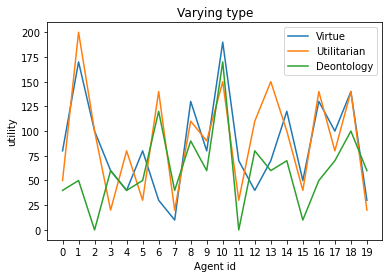

In [13]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

[0, 1, 2]


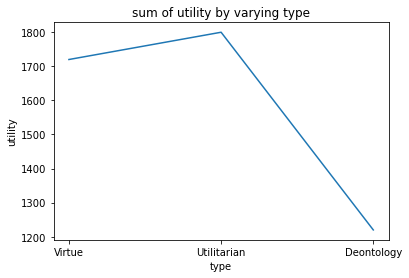

In [6]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr)

[0, 1, 2]


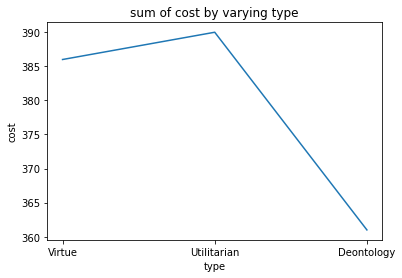

In [7]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr)

In [8]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
20.0


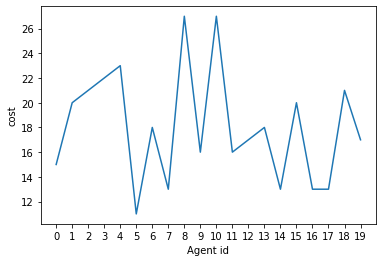

In [9]:
plotAgentwiseProp(G, "cost")

In [10]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


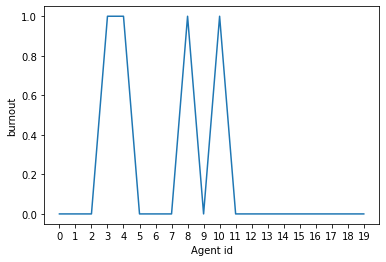

In [11]:
plotAgentwiseProp(G, "burnout")

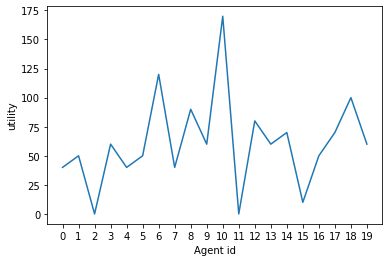

In [12]:
plotAgentwiseProp(G, "utility")